In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from IPython.display import display

# Display data

In [41]:
data_path = "../data/breast-cancer.csv"
df = pd.read_csv(data_path, index_col= "id")
display(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


## Two classes analysis

In [42]:
df_0 = df[df["diagnosis"]=="B"]
df_1 = df[df["diagnosis"]=="M"]
df_0_describe = df_0.describe()
df_0_describe.columns.name = "Target B"
df_1_describe = df_1.describe()
df_1_describe.columns.name = "Target M"
display(df_0_describe)
display(df_1_describe)

Target B,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


Target M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


C:\Users\derar\AppData\Local\Temp\ipykernel_18296\1783276033.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


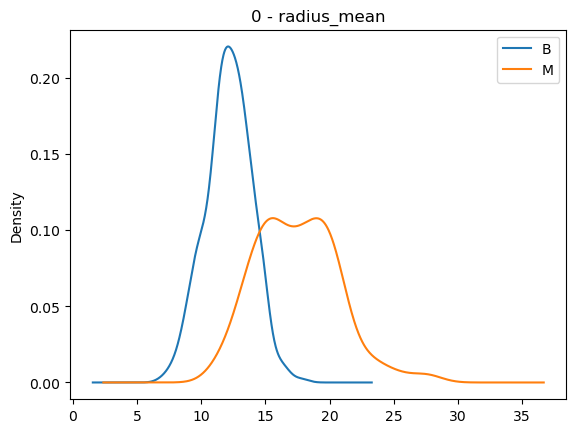

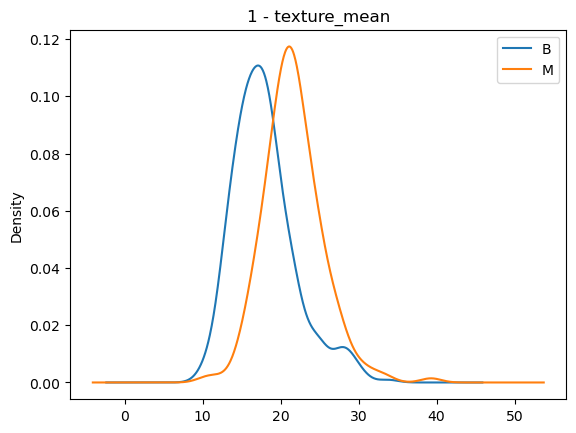

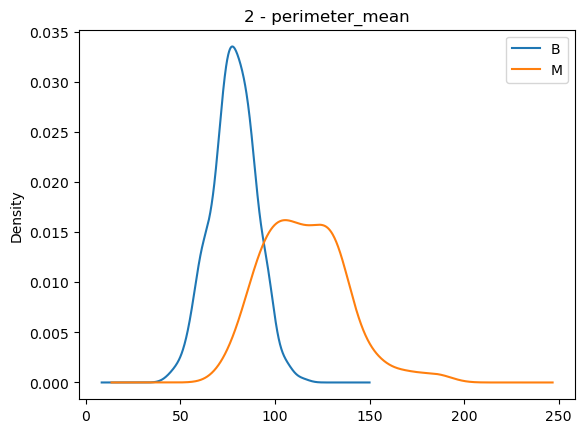

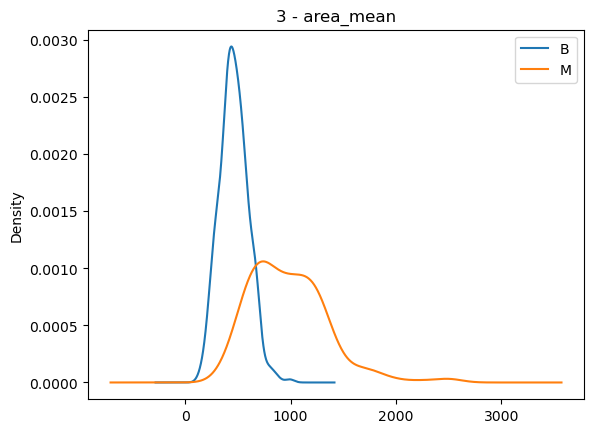

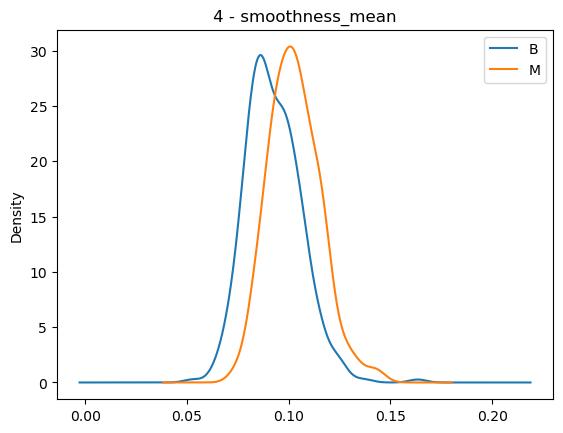

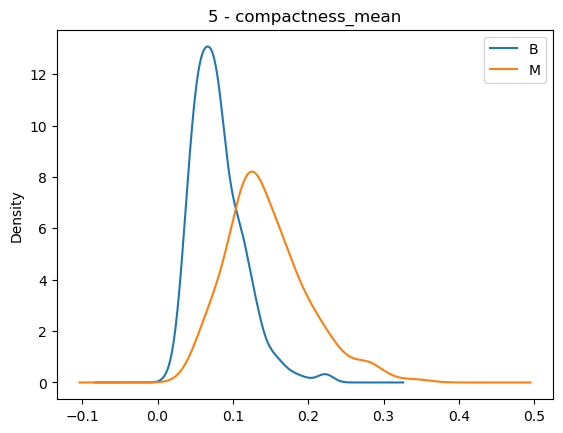

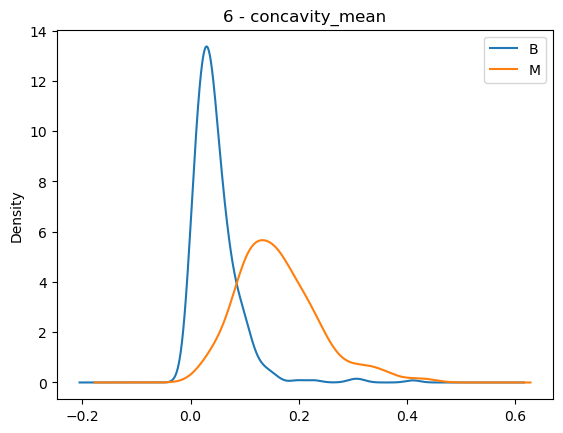

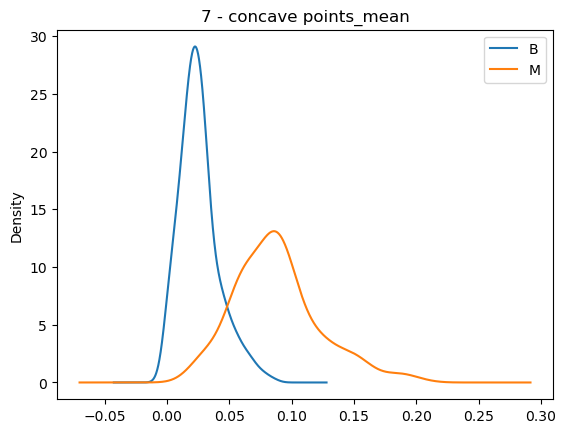

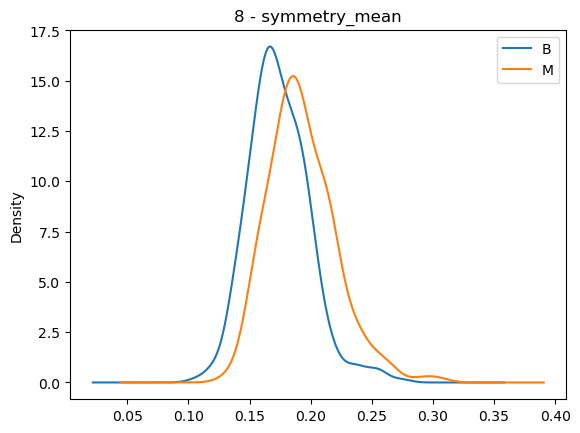

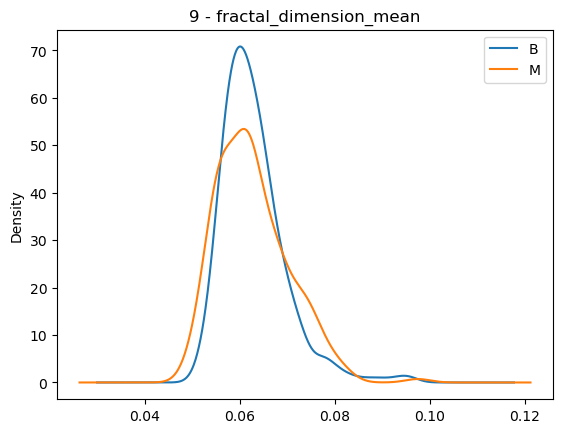

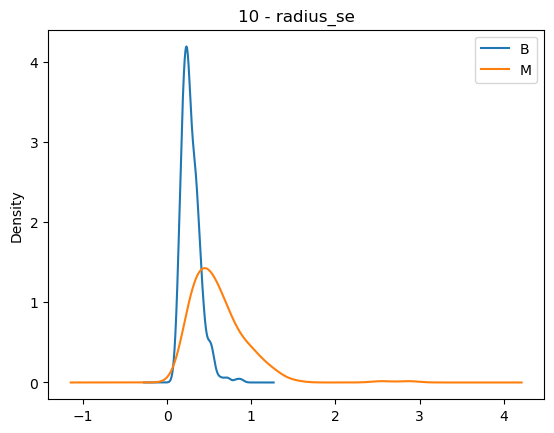

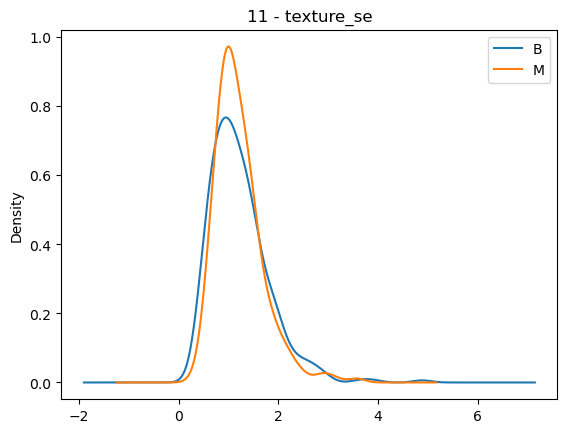

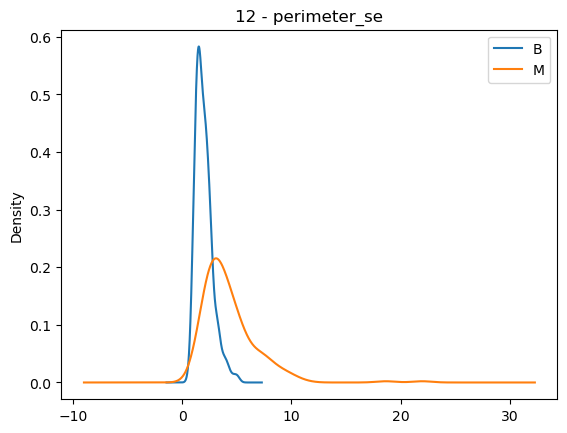

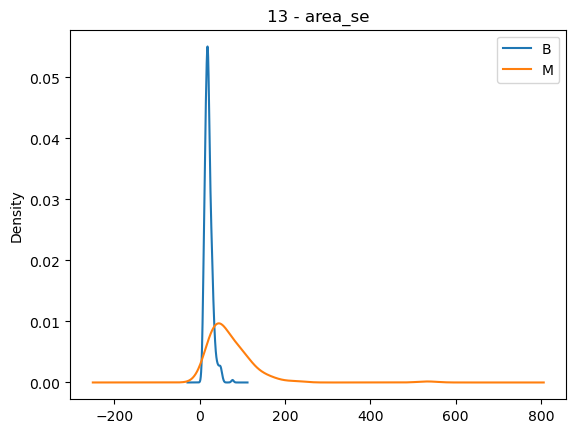

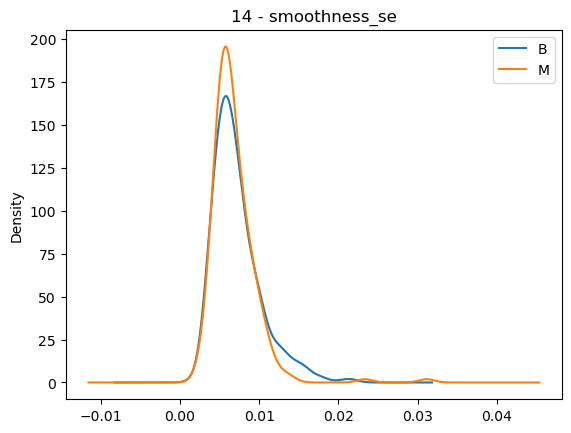

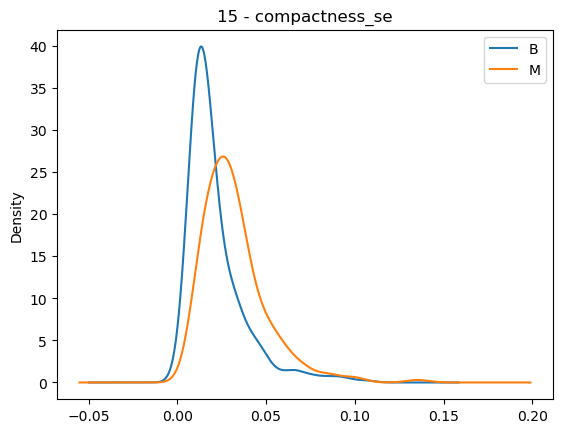

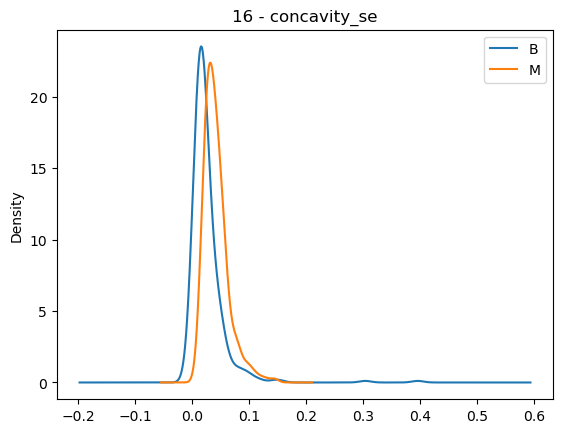

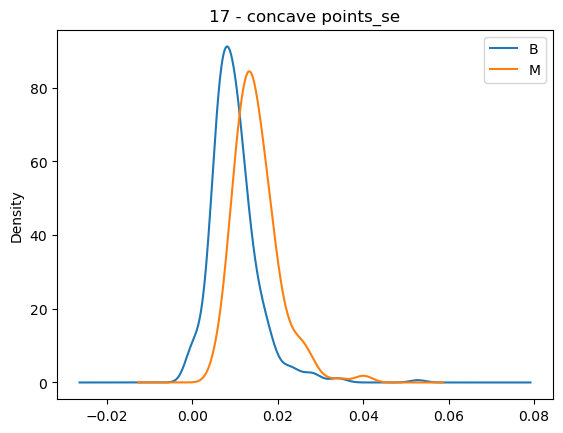

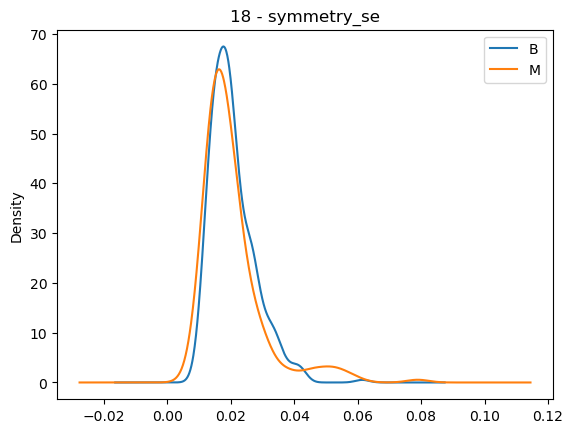

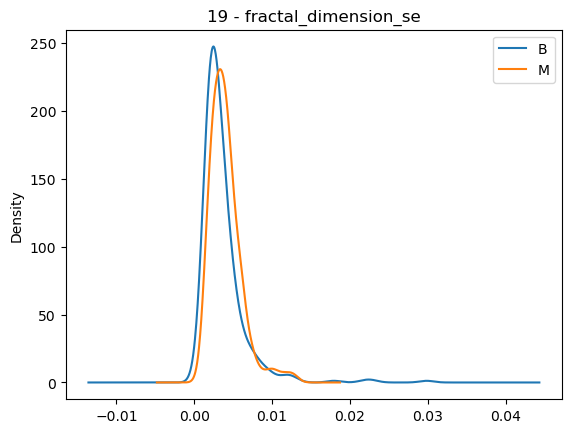

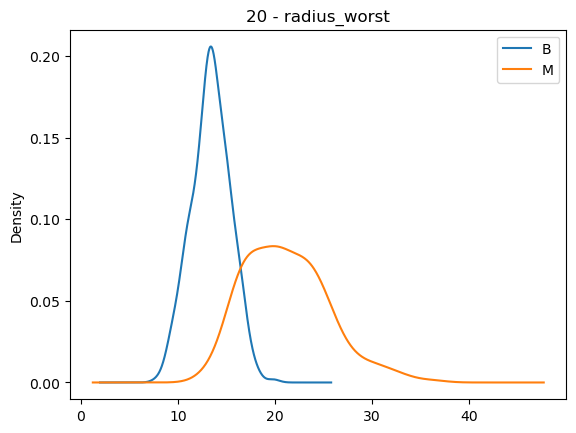

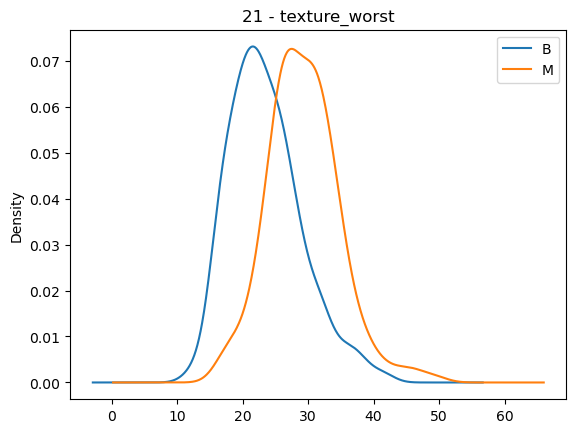

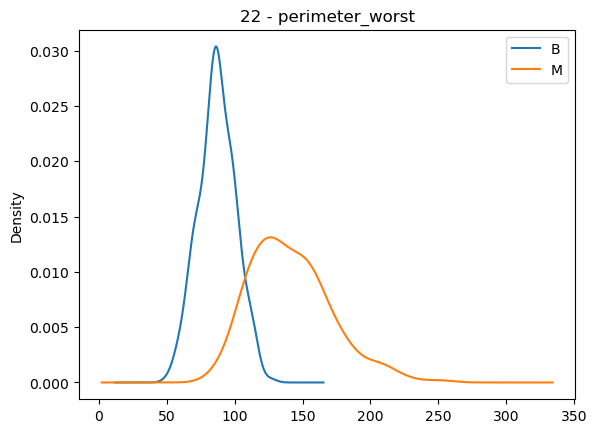

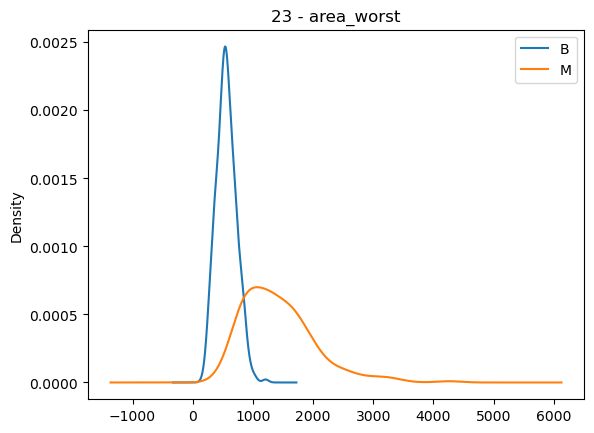

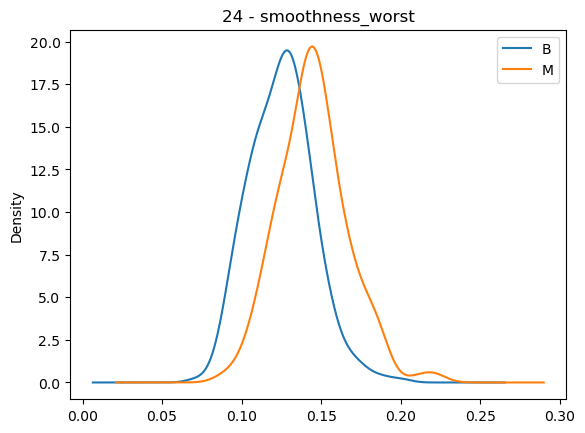

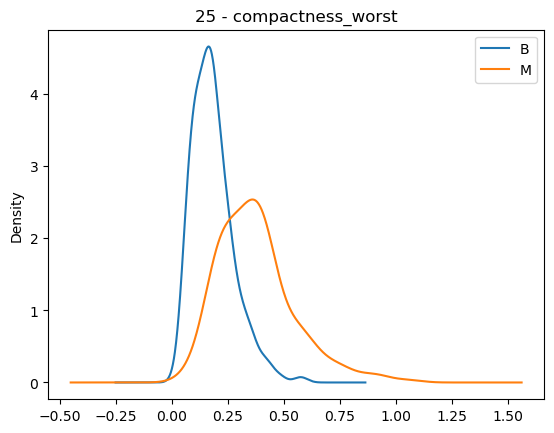

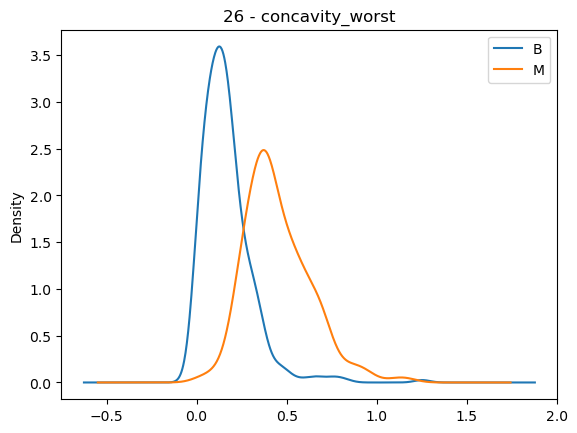

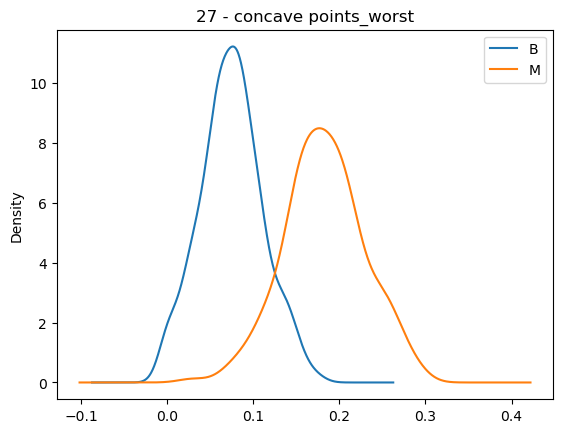

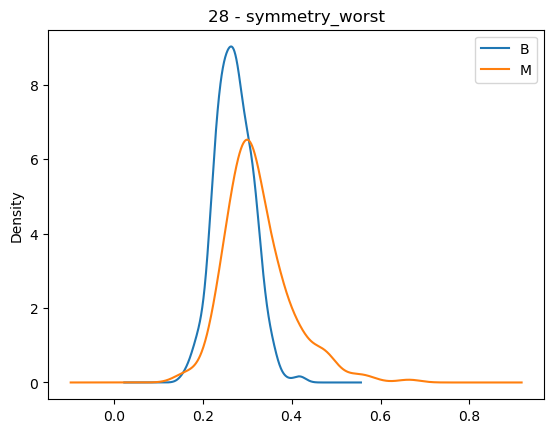

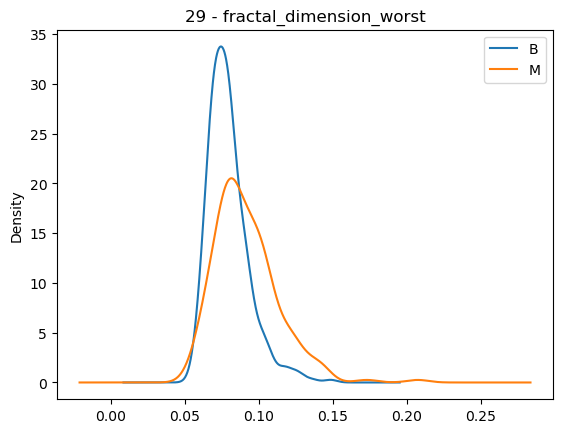

In [43]:
features = list(df.columns)
features = features[1:]
count = 0
for measurment in features:
    fig, ax = plt.subplots()
    df_0[measurment].plot(kind='kde')
    df_1[measurment].plot(kind='kde')
    ax.legend(["B", "M"])
    ax.set_title(f"{count} - {measurment}")
    count+=1

In [44]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [45]:
features_new = features[0:1]
features_new += features[5:8]
features_new += features[25:28]

print(features_new)
df_new_features = pd.concat([df[features_new], df[['diagnosis']]], axis = 1)
display(df_new_features)

['radius_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']


,radius_mean,compactness_mean,concavity_mean,concave points_mean,compactness_worst,concavity_worst,concave points_worst,diagnosis
id,,,,,,,,
842302,17.99,0.27760,0.30010,0.14710,0.66560,0.7119,0.2654,1
842517,20.57,0.07864,0.08690,0.07017,0.18660,0.2416,0.1860,1
84300903,19.69,0.15990,0.19740,0.12790,0.42450,0.4504,0.2430,1
84348301,11.42,0.28390,0.24140,0.10520,0.86630,0.6869,0.2575,1
84358402,20.29,0.13280,0.19800,0.10430,0.20500,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...
926424,21.56,0.11590,0.24390,0.13890,0.21130,0.4107,0.2216,1
926682,20.13,0.10340,0.14400,0.09791,0.19220,0.3215,0.1628,1
926954,16.60,0.10230,0.09251,0.05302,0.30940,0.3403,0.1418,1


# PCA

In [46]:
df_new_features = df_new_features.drop("diagnosis", axis=1)
names = list(df_new_features.index)

# Separating out the features
x = df_new_features.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Compute 2d pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'], index = names)
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
finalDf['diagnosis'] = finalDf['diagnosis'].replace({'B': 0, 'M': 1})
finalDf.index.name = "id"
display(finalDf)

,principal component 1,principal component 2,diagnosis
id,,,
842302,6.345440,0.907638,1
842517,0.807774,-1.957987,1
84300903,3.748659,-0.917481,1
84348301,5.461236,3.208558,1
84358402,2.276377,-1.614202,1
...,...,...,...
926424,3.242702,-2.288607,1
926682,1.538415,-1.814275,1
926954,0.681379,-0.322761,1


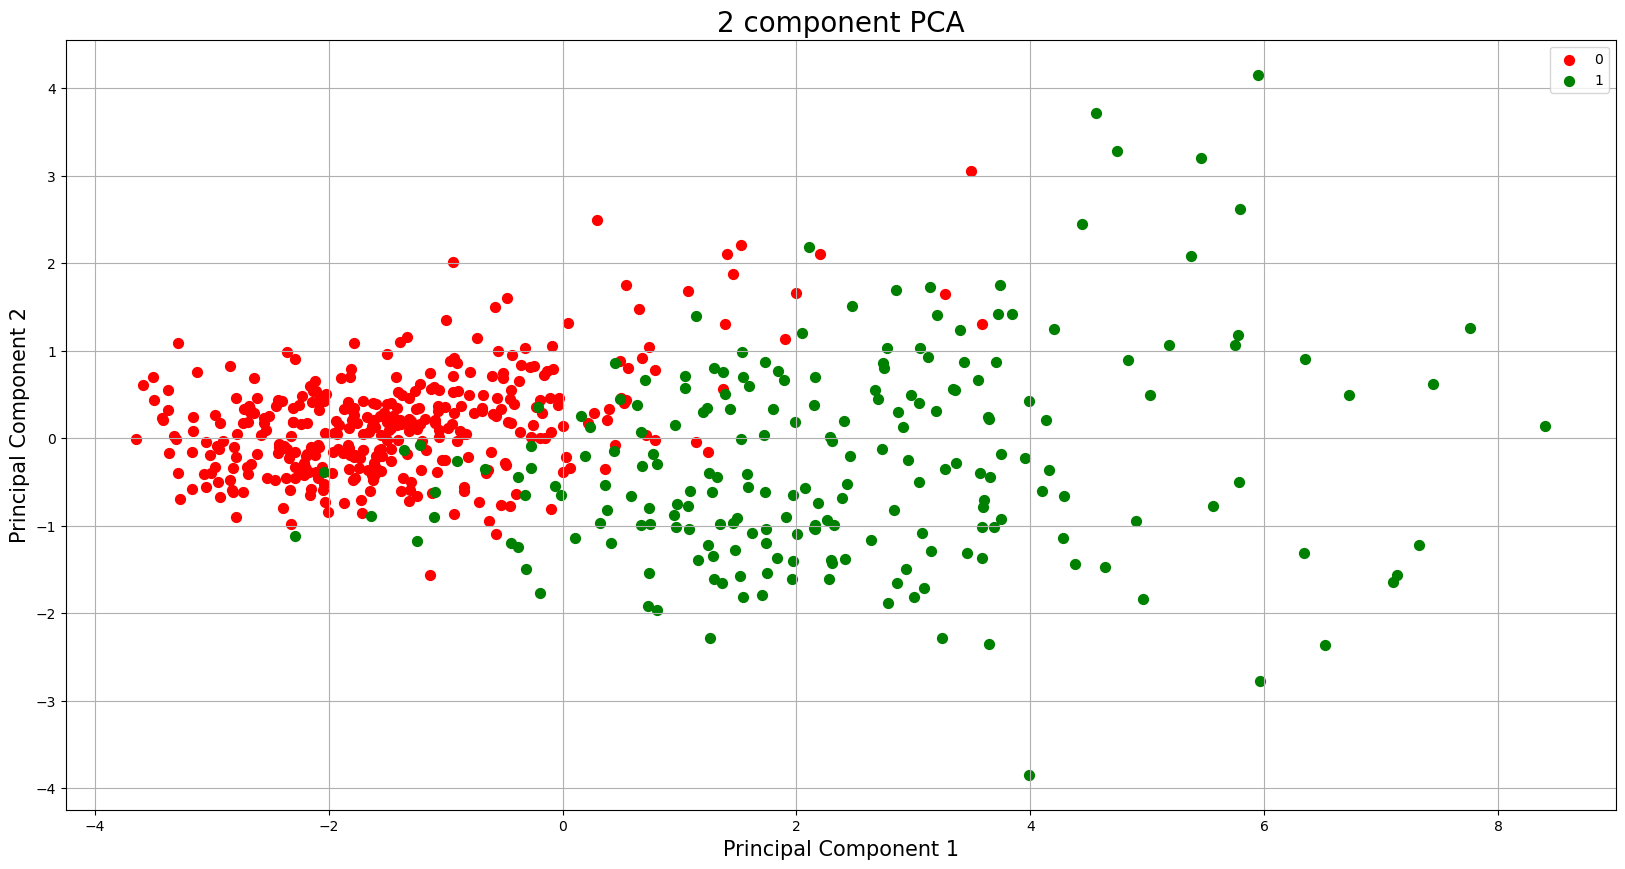

In [47]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(f'2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [48]:
pca.explained_variance_ratio_

array([0.80907961, 0.11255873])

# T-SNE

C:\Users\derar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\derar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


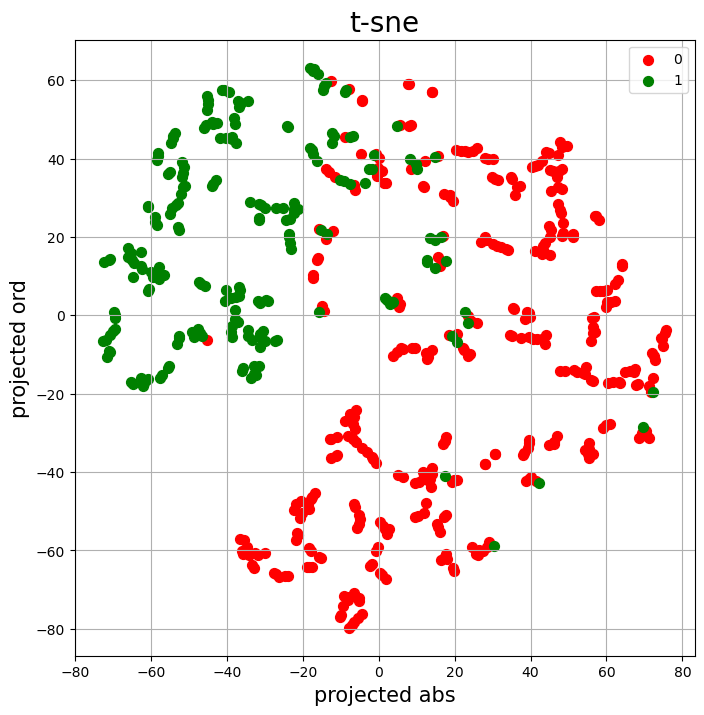

In [49]:

# After doing a grid search we adopt the value 6 for perplexity

model_tsne = TSNE(n_components = 2, perplexity = 4, random_state = 1)
X_embedded_tsne = model_tsne.fit_transform(x)
tsne_projected_df = pd.DataFrame(X_embedded_tsne,
                       columns = ["projected_abs", "projected_ord"], index = names)

finalDf = pd.concat([tsne_projected_df, df[['diagnosis']]], axis = 1)
targets = [0, 1]
colors = ['r', 'g']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(tsne_projected_df.loc[indicesToKeep, 'projected_abs']
               ,tsne_projected_df.loc[indicesToKeep, 'projected_ord']
               , c = color
               , s = 50)
ax.set_title(f't-sne', fontsize = 20)
ax.set_xlabel('projected abs', fontsize = 15)
ax.set_ylabel('projected ord', fontsize = 15)
ax.legend(targets)
ax.grid()